## Linear regression demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

Create a synthetic data set

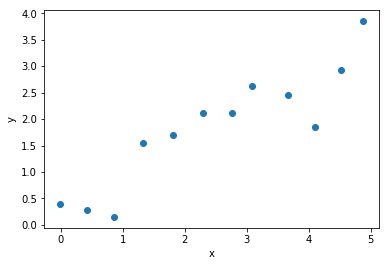

In [2]:
n = 12
d = 2

x = np.linspace(0,5,n)  + np.random.randn(n)*0.05
y = x*0.7 + np.random.randn(n)*0.5
X = x[:,None]

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y');

Run linear regression

In [3]:
lr = LinearRegression()
lr.fit(X, y);

### Visualizing PCA

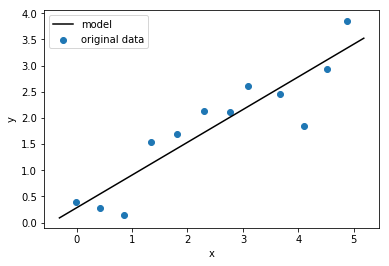

In [4]:
def make_plot(lr, x, y):
    # visualize the subspace spanned by W
    grid = np.linspace(np.min(x)-0.3,np.max(x)+.3,1000)[:,None]

    plt.scatter(x, y, label="original data")
    plt.xlabel('x')
    plt.ylabel('y');
    plt.plot(grid, lr.predict(grid), 'black', label="model")
    plt.legend()
    
make_plot(lr, x, y)

Moving to $d=2$

In [24]:
n = 12
d = 2

x1 = np.linspace(0,5,n)  + np.random.randn(n)*0.05
x2 = -x1*0.2 + np.random.randn(n)*2
xy = x1*0.7 + np.random.randn(n)*3

X = np.concatenate((x1[:,None],x2[:,None]),axis=1)

Let's look at the points.

In [25]:
trace_scatter = go.Scatter3d(x=X[:,0], y=X[:,1], z=y, mode='markers')
layout = go.Layout(showlegend=False, scene={'xaxis':{'title':"x1"}, 'yaxis':{'title':"x2"}, 'zaxis':{'title':"y"}})
fig = go.Figure(data=[trace_scatter], layout=layout)
iplot(fig)

Let's look at what linear regression gives us...

In [26]:
lr = LinearRegression()
lr.fit(X,y)

# get grid for visualizing plane
grid0 = np.linspace(np.min(X[:,0])-0.3,np.max(X[:,0])+.3,100)[:,None]
grid1 = np.linspace(np.min(X[:,1])-0.3,np.max(X[:,1])+.3,100)[:,None]
grid00, grid11 = np.meshgrid(grid0, grid1)
grid2d = np.c_[grid00.ravel(), grid11.ravel()]

pred = lr.predict(grid2d)

trace_fit = go.Surface(x=grid00, y=grid11, z=np.reshape(pred, (100,100)), showscale=False, opacity=0.9)

layout = go.Layout(showlegend=False, scene={'xaxis':{'title':"x1"}, 'yaxis':{'title':"x2"}, 'zaxis':{'title':"y"}})

fig = go.Figure(data=[trace_fit, trace_scatter], layout=layout)
iplot(fig)

In [27]:
lr.coef_

array([ 0.63506519, -0.04944245])

In [28]:
lr.intercept_

0.23290927852616083